#**Ejercicio PCA**
**Elaborado por:** Antonella Arcos


Tu tarea es hacer un análisis de componentes principales para agilizar un algoritmo de clasificación en un conjunto de datos multidimensional.

Usaremos el conjunto de datos de dígitos MNIST, que viene preinstalado en sklearn. Este conjunto de datos tiene imágenes de 8x8 pixeles de dígitos escritos a mano del 0 al 9. Tu tarea es clasificarlos para determinar qué dígitos son. Usa el ACP para decrementar las dimensiones en este conjunto de datos. Luego, usa un algoritmo de clasificación de tu elección para clasificar los dígitos. Nota que depende de ti determinar cuántos componentes principales usar para tu modelo, para conseguir un 95% de varianza en los datos.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
df = mnist.data
print(df.shape)
df.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from keras.datasets import mnist
# Datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Remodelar datos
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Estandarizar data
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X_train)

In [5]:
# Aplicar modelo PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

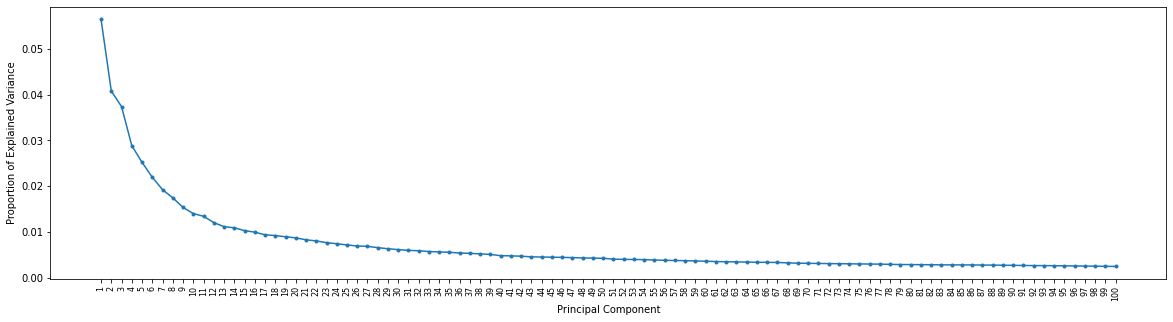

In [6]:
# Graficar los ratios de varianza explicadas de los primeros 100 componentes principales
plt.plot(range(1, 101), pca.explained_variance_ratio_[:100], marker = '.')
plt.xticks(ticks = range(1, 101),fontsize=8, rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.gcf().set_size_inches(20, 5);

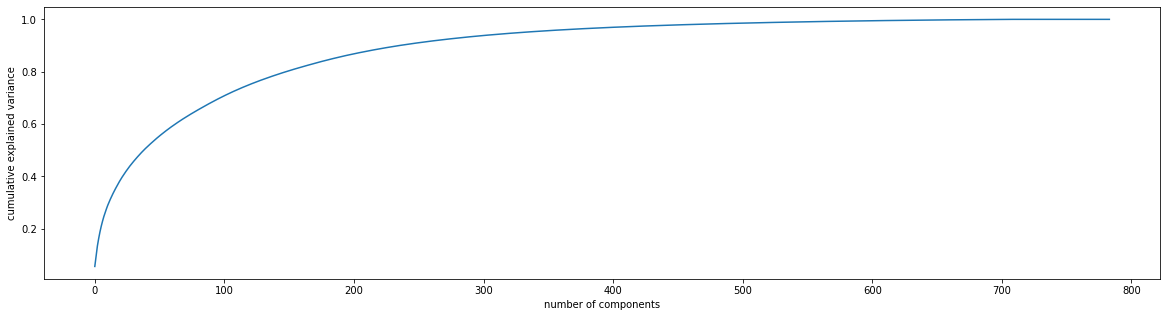

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.gcf().set_size_inches(20, 5);

In [8]:
# Obtener el número de componentes principales que acumulen el 95 de varianza
var=pca.explained_variance_ratio_
cum_var = 0
for i, v in enumerate(var):
    cum_var = cum_var + v
    if cum_var > 0.95:
        print("95% variance:", i)  
        break

# Tomado de:
# https://djy-git.github.io/2020/03/05/pca_mnist.html#gsc.tab=0

95% variance: 330


In [9]:
# Escalar datos
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
# Ajustar PCA
pca = PCA(n_components = 330)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 330)
(10000, 330)


In [11]:
# Se corre un modelo que se ajuste a la data
print(set(y_train))
print(set(y_test))
print(y_train.shape)
print(y_test.shape)

# El modelo es de clasificación ya que la variable dependiente es categórica

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(60000,)
(10000,)


**Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier(n_estimators = 200,
                             bootstrap = True, 
                             oob_score = True)

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

In [20]:
print('Training accuracy:', rfc.score(X_train_pca, y_train))
print('Test accuracy:', rfc.score(X_test_pca, y_test))

Training accuracy: 1.0
Test accuracy: 0.9405
